In [1]:
pwd()

"/groups/scicompsoft/home/arthurb/projects/darshan/ArthurKimChenPreibischDarshan2023"

In [2]:
]activate .

  Activating project at `/groups/scicompsoft/home/arthurb/projects/darshan/ArthurKimChenPreibischDarshan2023`


In [3]:
using TrainSpikingNet

In [4]:
N = (10000, 20000, 50000)

(10000, 20000, 50000)

In [5]:
for n in N
    @info n
    param("sinusoid-N$(n)-K512-L45/")
    config("sinusoid-N$(n)-K512-L45/", :cpu)
    init()
    train(nloops=10, correlation_interval=11)
end

[ Info: 10000


LBTConfig([ILP64] libmkl_rt.so, [LP64] libmkl_rt.so)
mean excitatory firing rate: 4.0685 Hz
mean inhibitory firing rate: 7.3274 Hz
Loop no. 1, task no. 1
elapsed time: 11.027350902557373 sec
firing rate: 5.46255 Hz
Loop no. 2, task no. 1
elapsed time: 10.310832023620605 sec
firing rate: 5.4586 Hz
Loop no. 3, task no. 1
elapsed time: 10.13038182258606 sec
firing rate: 5.4604 Hz
Loop no. 4, task no. 1
elapsed time: 10.379148006439209 sec
firing rate: 5.46965 Hz
Loop no. 5, task no. 1
elapsed time: 10.602964878082275 sec
firing rate: 5.4766 Hz
Loop no. 6, task no. 1
elapsed time: 10.300296783447266 sec
firing rate: 5.47255 Hz
Loop no. 7, task no. 1
elapsed time: 10.15105414390564 sec
firing rate: 5.48445 Hz
Loop no. 8, task no. 1
elapsed time: 10.094385862350464 sec
firing rate: 5.48925 Hz
Loop no. 9, task no. 1
elapsed time: 9.494551181793213 sec
firing rate: 5.4831 Hz
Loop no. 10, task no. 1
elapsed time: 15.47248888015747 sec
firing rate: 5.48565 Hz
LBTConfig([ILP64] libmkl_rt.so, [LP6

[ Info: 20000


mean excitatory firing rate: 4.03585 Hz
mean inhibitory firing rate: 7.3531 Hz
Loop no. 1, task no. 1
elapsed time: 20.049821138381958 sec
firing rate: 5.45285 Hz
Loop no. 2, task no. 1
elapsed time: 16.886746883392334 sec
firing rate: 5.45785 Hz
Loop no. 3, task no. 1
elapsed time: 19.633852005004883 sec
firing rate: 5.4654 Hz
Loop no. 4, task no. 1
elapsed time: 16.428849935531616 sec
firing rate: 5.460825 Hz
Loop no. 5, task no. 1
elapsed time: 19.231980800628662 sec
firing rate: 5.46245 Hz
Loop no. 6, task no. 1
elapsed time: 16.010476112365723 sec
firing rate: 5.458725 Hz
Loop no. 7, task no. 1
elapsed time: 19.258574962615967 sec
firing rate: 5.4625 Hz
Loop no. 8, task no. 1
elapsed time: 16.240751028060913 sec
firing rate: 5.459575 Hz
Loop no. 9, task no. 1
elapsed time: 19.049234867095947 sec
firing rate: 5.4657 Hz
Loop no. 10, task no. 1
elapsed time: 25.599079132080078 sec
firing rate: 5.4695 Hz


[ Info: 50000


LBTConfig([ILP64] libmkl_rt.so, [LP64] libmkl_rt.so)
mean excitatory firing rate: 4.04982 Hz
mean inhibitory firing rate: 7.38974 Hz
Loop no. 1, task no. 1
elapsed time: 48.611263036727905 sec
firing rate: 5.47982 Hz
Loop no. 2, task no. 1
elapsed time: 45.36648416519165 sec
firing rate: 5.48533 Hz
Loop no. 3, task no. 1
elapsed time: 57.68014597892761 sec
firing rate: 5.48251 Hz
Loop no. 4, task no. 1
elapsed time: 43.357369899749756 sec
firing rate: 5.485 Hz
Loop no. 5, task no. 1
elapsed time: 42.62958788871765 sec
firing rate: 5.48645 Hz
Loop no. 6, task no. 1
elapsed time: 42.52591681480408 sec
firing rate: 5.49597 Hz
Loop no. 7, task no. 1
elapsed time: 54.74465203285217 sec
firing rate: 5.49232 Hz
Loop no. 8, task no. 1
elapsed time: 44.56774711608887 sec
firing rate: 5.49583 Hz
Loop no. 9, task no. 1
elapsed time: 44.40165400505066 sec
firing rate: 5.49619 Hz
Loop no. 10, task no. 1
elapsed time: 74.79863214492798 sec
firing rate: 5.49708 Hz


In [6]:
using JLD2, Statistics

In [7]:
x = Float64[]
y = Float64[]
for n in N
    curve = load("sinusoid-N$(n)-K512-L45/learning-curve.jld2")
    push!(x, n)
    push!(y, median(curve["elapsed_time"]))
end

In [8]:
using CairoMakie

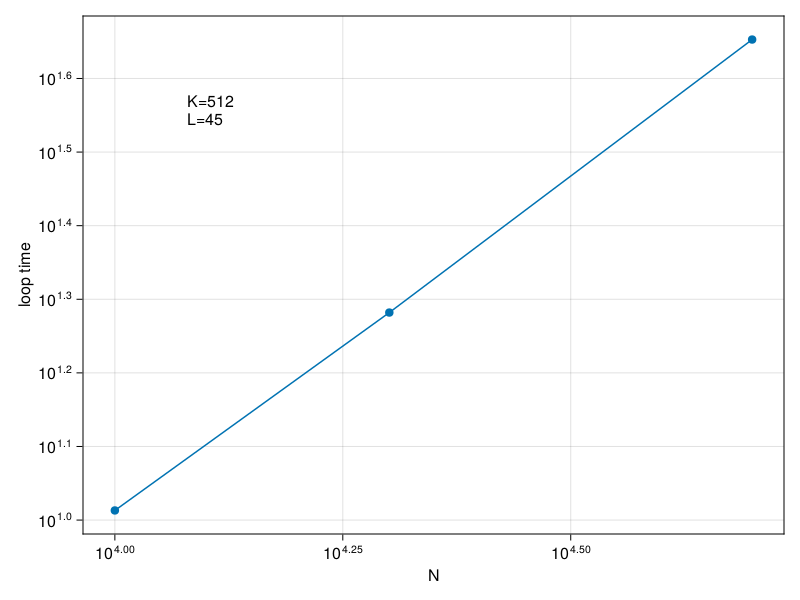

In [9]:
fig, ax, _ = scatterlines(x, y)
ax.xscale = log10
ax.yscale = log10
ax.xlabel = "N"
ax.ylabel = "loop time"
text!(ax, "K=512\nL=45", position=(12000,34), space = :data)
fig